##### Step-1:Import datasets and libraries,check shape and datatype.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
#importing data
path =r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\train.csv"
data_train=pd.read_csv(path)

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape

(14999, 9)

In [5]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

##### Step-2:Visualise the dataset using plotting using heatmaps and plots.

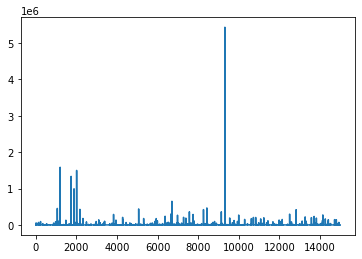

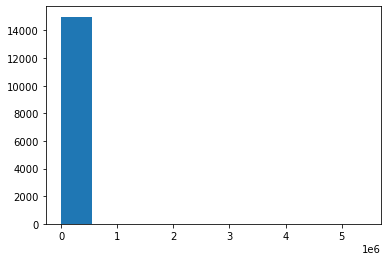

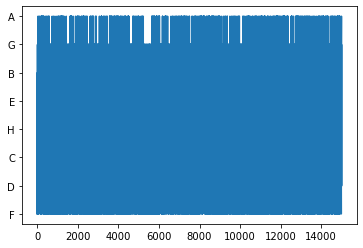

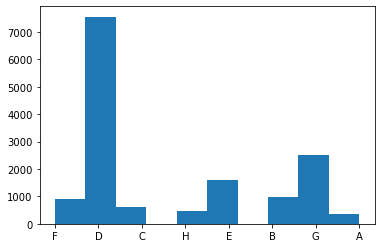

In [6]:
#visualizing the data for individual attributes
plt.plot(data_train["adview"])
plt.show()
plt.hist(data_train["adview"])
plt.show()
plt.plot(data_train["category"])
plt.show()
plt.hist(data_train["category"])
plt.show()

In [7]:
#Removing the videos which are having adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] < 2000000]

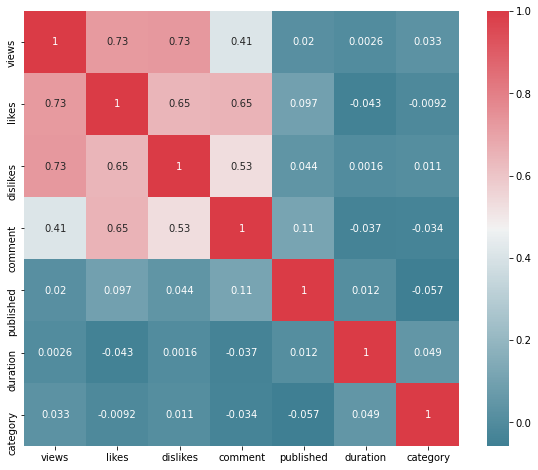

In [48]:
#Heatmap plotting
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,bool), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax ,annot=True)
plt.show()

##### Step-3:Clean the dataset by removing missing values and other things

In [9]:
#Removing the character "F" wherever it is present in the data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [10]:
#Assigning a number for each category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Step-4:Transform attributes into numerical values and other necessary transformations

In [11]:
#convert string values into integers for the attributes called views,likes,comments,dislikes and adview
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

In [12]:
#Encoding the attribute features like duration,vidid,published
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
#Converting duration into Time_in_sec format 
import datetime
import time
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    p=['H','M','S']
    for i in y:
        if i not in p:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv(r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\train.csv")
mp=pd.read_csv(r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\train.csv")["duration"]
time=mp.apply(checki)

def func_sec(time_string):
    h,m,s =time_string.split(':')
    return int(h) * 3600 + int(m) *60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


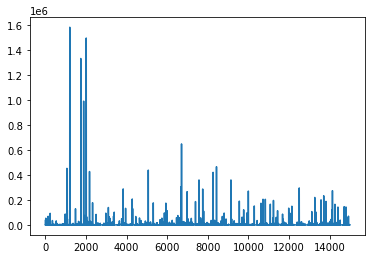

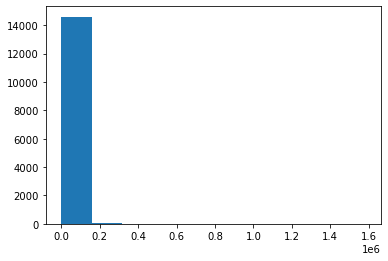

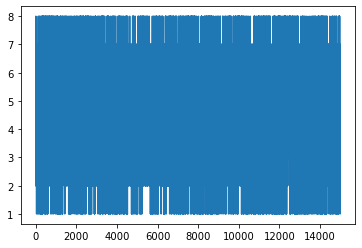

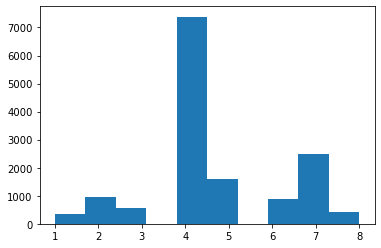

In [14]:
#visualizing the data for individual attributes
plt.plot(data_train["adview"])
plt.show()
plt.hist(data_train["adview"])
plt.show()
plt.plot(data_train["category"])
plt.show()
plt.hist(data_train["category"])
plt.show()

In [15]:
#Removing the videos which are having adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] < 2000000]
data_train
data_train.shape

(14636, 9)

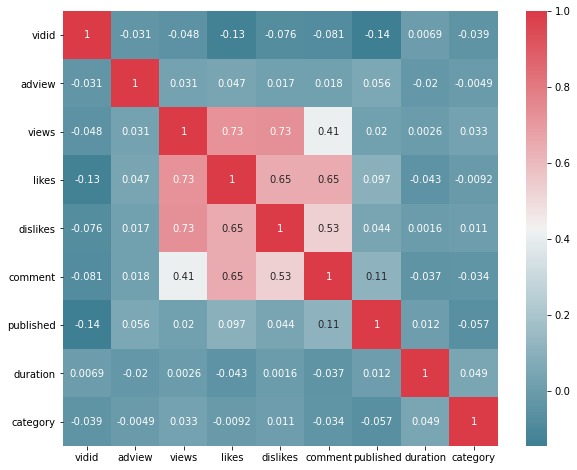

In [16]:
#Heatmap plotting
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax ,annot=True)
plt.show()

##### Step-5:Normalise your data and split the data into training, validation and test set in the appropriate ratio

In [17]:
#Split the dataset into training and testing
Y_train = pd.DataFrame(data=data_train.iloc[:,1].values,columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [18]:
data_train.shape

(14636, 7)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
x_train.shape

(11708, 7)

In [20]:
#Normalise the dataset using scalars
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train.mean()
#x_train.std()

0.1739096800320488

##### Step-6:Use linear regression, Support Vector Regressor for training and get errors

In [21]:
#Evaluation metrics
from sklearn import metrics
def print_error(x_test,y_test,model_name):
    prediction = model_name.predict(x_test)
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Sqaured Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [22]:
#Linear Regression Model
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(x_train,y_train)
print_error(x_test,y_test,linear_regression)


Mean Absolute Error: 3707.3780058245334
Mean Squared Error: 835663131.1210337
Root Mean Sqaured Error: 28907.83857573986


In [23]:
#Support Vector Regressor Model
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,np.ravel(y_train))
print_error(x_test,y_test,supportvector_regressor)

Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Sqaured Error: 28873.617300732723


##### Step-7:Use Decision Tree Regressor and Random Forest Regressors

In [24]:
#Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree = DecisionTreeRegressor(splitter='best', random_state=None)
decision_tree.fit(x_train,y_train)
print_error(x_test,y_test,decision_tree)

Mean Absolute Error: 2777.4207650273224
Mean Squared Error: 900657598.261612
Root Mean Sqaured Error: 30010.957969741852


In [25]:
#Random Forest regressor model
from sklearn.ensemble import  RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(x_train,np.ravel(y_train))
print_error(x_test,y_test,random_forest)

Mean Absolute Error: 3360.9650604432063
Mean Squared Error: 736769883.8074012
Root Mean Sqaured Error: 27143.505370666502


##### Step-8:Build an artificial neural network and train it with different layers and hyperparameters. Experiment a little. Use keras.

In [26]:
#Artificial Neural network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu", 
                                input_shape=x_train.shape[1:]), 
                                Dense(6,activation="relu"), 
                                Dense(1) 
                                ]) 
optimizer=keras.optimizers.Adam() 
loss=keras.losses.mean_squared_error 
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100) 
ann.summary() 
print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767406208.0000 - mean_squared_error: 767406208.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767399360.0000 - mean_squared_error: 767399360.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767383168.0000 - mean_squared_error: 767383168.0000
Epoch 4/100
366/366 [==============================] - 1s 1ms/step - loss: 767349824.0000 - mean_squared_error: 767349824.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767293056.0000 - mean_squared_error: 767293056.0000
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 767212352.0000 - mean_squared_error: 767212352.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767106048.0000 - mean_squared_error: 767106048.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 766977536.0000 - mean_squared_error:

366/366 [==============================] - 1s 1ms/step - loss: 763655040.0000 - mean_squared_error: 763655040.0000
Epoch 64/100
366/366 [==============================] - 0s 1ms/step - loss: 763645440.0000 - mean_squared_error: 763645440.0000
Epoch 65/100
366/366 [==============================] - 0s 1ms/step - loss: 763640448.0000 - mean_squared_error: 763640448.0000
Epoch 66/100
366/366 [==============================] - 0s 1ms/step - loss: 763629760.0000 - mean_squared_error: 763629760.0000
Epoch 67/100
366/366 [==============================] - 0s 1ms/step - loss: 763620608.0000 - mean_squared_error: 763620608.0000
Epoch 68/100
366/366 [==============================] - 0s 1ms/step - loss: 763611584.0000 - mean_squared_error: 763611584.0000
Epoch 69/100
366/366 [==============================] - 0s 1ms/step - loss: 763602368.0000 - mean_squared_error: 763602368.0000
Epoch 70/100
366/366 [==============================] - 0s 1ms/step - loss: 763592704.0000 - mean_squared_error: 7635

In [27]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor,"supportvector_youtubeadview.pkl")

['supportvector_youtubeadview.pkl']

In [28]:
#Saving keras Artificial Neural Network Model
ann.save("ann_youtubeadview.h5")

# Testing the test.csv dataset

### Test.csv file preprocessing

In [29]:
#importing data
path =r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\test.csv"
data_test=pd.read_csv(path)

In [30]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [31]:
data_test.shape

(8764, 8)

In [32]:
from keras.models import load_model 
model=load_model("ann_youtubeadview.h5")

In [33]:
#Removing the character "F" wherever it is present in the data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [34]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [35]:
#Assigning a number for each category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [36]:
#convert string values into integers for the attributes called views,likes,comments and dislikes 
data_test["views"]=pd.to_numeric(data_test["views"])
data_test["comment"]=pd.to_numeric(data_test["comment"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])

column_vidid=data_test['vidid']

In [37]:
#Encoding the attribute features like duration,vidid,published
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [38]:
#Converting duration into Time_in_sec format 
import datetime
import time
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    p=['H','M','S']
    for i in y:
        if i not in p:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv(r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\test.csv")
mp=pd.read_csv(r"C:\Users\Sailaja Sanni\Desktop\NEO INTERNSHIP\ML INTERNSHIP\PROJECT WEEK\test.csv")["duration"]
time=mp.apply(checki)

def func_sec(time_string):
    h,m,s =time_string.split(':')
    return int(h) * 3600 + int(m) *60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


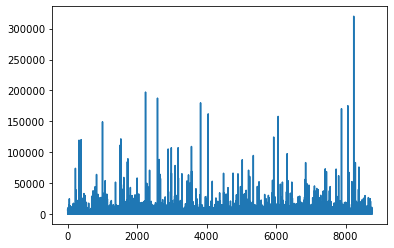

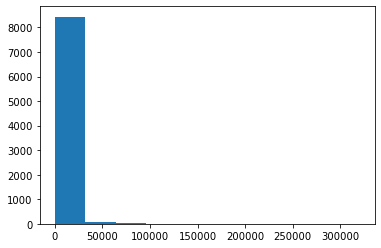

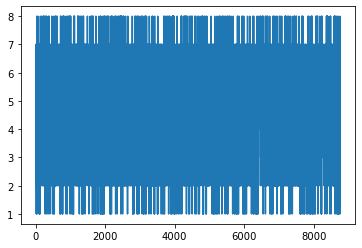

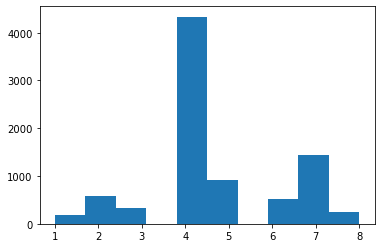

In [39]:
#visualizing the data for individual attributes
plt.plot(data_test["likes"])
plt.show()
plt.hist(data_test["likes"])
plt.show()

plt.plot(data_test["category"])
plt.show()
plt.hist(data_test["category"])
plt.show()


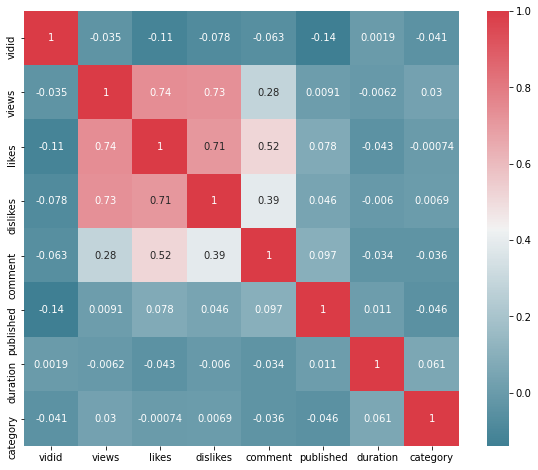

In [40]:
#Heatmap plotting
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data_test.corr()
sns.heatmap(corr,mask=np.zeros_like(corr), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax ,annot=True)
plt.show()

In [41]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

#### prediction of ‘adview’ for the test.csv data.

In [43]:
prediction = model.predict(X_test)

In [44]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [45]:
prediction = prediction.rename(columns={0: "Adview"})

In [46]:
prediction.head()

,Adview
0,2175.437500
1,2359.972168
2,1407.820190
3,1265.895020
4,2085.244629


##### After predicting ‘adview’ save the column in a predictions.csv file.

In [47]:
prediction.to_csv('predictions.csv')